## Data: Hyperspectral Remote Sensing Scenes
> http://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes

**Indian Pines**

This scene was gathered by AVIRIS sensor over the Indian Pines test site in North-western Indiana and consists of $145\times145$ pixels and 224 spectral reflectance bands in the wavelength range 0.4–2.5 10^(-6) meters. This scene is a subset of a larger one. The Indian Pines scene contains two-thirds agriculture, and one-third forest or other natural perennial vegetation. There are two major dual lane highways, a rail line, as well as some low density housing, other built structures, and smaller roads. Since the scene is taken in June some of the crops present, corn, soybeans, are in early stages of growth with less than 5% coverage. The ground truth available is designated into sixteen classes and is not all mutually exclusive. We have also reduced the number of bands to 200 by removing bands covering the region of water absorption: [104-108], [150-163], 220. Indian Pines data are available through Pursue's univeristy MultiSpec site.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from scipy.io import loadmat
indian_pines = loadmat('dataset/Indian_pines_corrected.mat')

In [3]:
# loadmat方法加载数据后会返回一个Python字典的数据结构
indian_pines.keys()

dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_corrected'])

In [4]:
# 由关键字可知，读取'indian_pines_corrected'字段
indian_pines = indian_pines['indian_pines_corrected']
indian_pines.shape

(145, 145, 200)

In [5]:
# numpy.ndarray类型
type(indian_pines)

numpy.ndarray

In [6]:
indian_pines[:,:,0].shape

(145, 145)

In [7]:
indian_pines.max()

9604

In [8]:
indian_pines.min()

955

In [9]:
indian_pines

array([[[3172, 4142, 4506, ..., 1057, 1020, 1020],
        [2580, 4266, 4502, ..., 1064, 1029, 1020],
        [3687, 4266, 4421, ..., 1061, 1030, 1016],
        ...,
        [2570, 3890, 4320, ..., 1042, 1021, 1015],
        [3170, 4130, 4320, ..., 1054, 1024, 1020],
        [3172, 3890, 4316, ..., 1043, 1034, 1016]],

       [[2576, 4388, 4334, ..., 1047, 1030, 1006],
        [2747, 4264, 4592, ..., 1055, 1039, 1015],
        [2750, 4268, 4423, ..., 1047, 1026, 1015],
        ...,
        [3859, 4512, 4605, ..., 1056, 1035, 1015],
        [3686, 4264, 4690, ..., 1051, 1012, 1020],
        [2744, 4268, 4597, ..., 1047, 1019, 1016]],

       [[2744, 4146, 4416, ..., 1055, 1029, 1025],
        [2576, 4389, 4416, ..., 1051, 1021, 1011],
        [2744, 4273, 4420, ..., 1068, 1033, 1010],
        ...,
        [2570, 4266, 4509, ..., 1051, 1025, 1010],
        [2576, 4262, 4496, ..., 1047, 1029, 1020],
        [2742, 4142, 4230, ..., 1042, 1025, 1011]],

       ...,

       [[3324, 3728, 400

In [10]:
indian_pines_gt = loadmat('dataset/Indian_pines_gt.mat')
print(indian_pines_gt.keys())

dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_gt'])


In [11]:
indian_pines_gt = indian_pines_gt['indian_pines_gt']
indian_pines_gt.shape

(145, 145)

In [12]:
indian_pines_gt

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
np.unique(indian_pines_gt)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

In [14]:
df_indian_pines_gt = pd.DataFrame(indian_pines_gt)
df_indian_pines_gt

0    1    2    3    4    5    6    7    8    9    ...  135  136  137  \
0      3    3    3    3    3    3    3    3    3    3  ...    0    0    0   
1      3    3    3    3    3    3    3    3    3    3  ...    0    0    0   
2      3    3    3    3    3    3    3    3    3    3  ...    0    0    0   
3      3    3    3    3    3    3    3    3    3    3  ...    0    0    0   
4      3    3    3    3    3    3    3    3    3    3  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
140    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
141    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
142    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
143    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
144    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     138  139  140  141  142  143  144  
0      0    0    0    0    0    0    0  
1      0    0    0    0    0    0    0  
2      0    0    0    0    0    0    0  
3      0    0    0    0    0    0    0  
4      0    0    0    0    0    0    0  
..   ...  ...  ...  ...  ...  ...  ...  
140    0    0    0    0    0    0    0  
141    0    0    0    0    0    0    0  
142    0    0    0    0    0    0    0  
143    0    0    0    0    0    0    0  
144    0    0    0    0    0    0    0  

[145 rows x 145 columns]

In [15]:
df_indian_pines_gt.to_csv("df_indian_pines_gt.csv", index = False)

In [16]:
indian_pines_gt.ravel().shape

(21025,)

## 读取数据

In [17]:
X = indian_pines
y = indian_pines_gt
print(f"X shape: {X.shape}\ny shape: {y.shape}")

X shape: (145, 145, 200)
y shape: (145, 145)


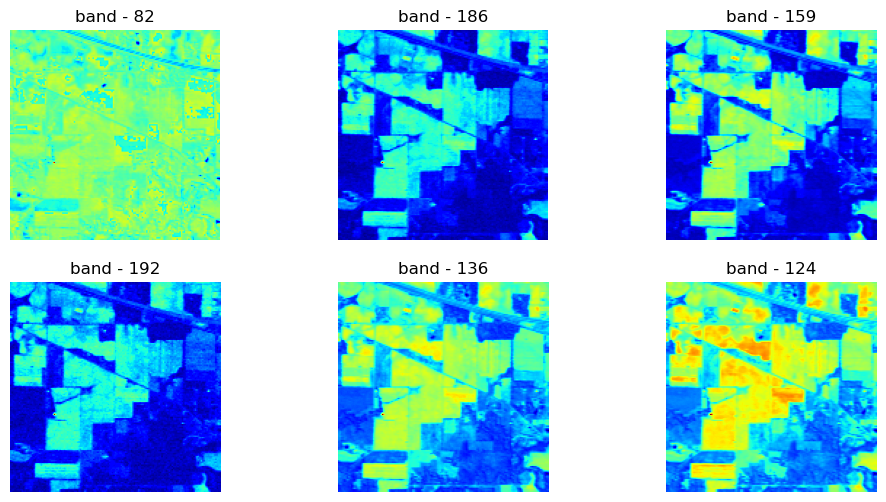

In [18]:
#随机生成波段，并展示该波段的图像
import seaborn as sns
sns.axes_style('whitegrid')
fig = plt.figure(figsize=(12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2, 3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:, :, q], cmap='jet')
    plt.axis('off')
    plt.title(f'band - {q}')

### 查看图像的真实标注

In [19]:
!pip install plotly
import plotly.express as px

cls = px.imshow(y, color_continuous_scale='jet')

cls.update_layout(title='Ground Truth', coloraxis_showscale=True)
cls.update_xaxes(showticklabels=False)
cls.update_yaxes(showticklabels=False)
cls.show()

### 将图像转换为CSV存储

In [20]:
def extract_pixels(X, y, save_name='indian_pines_all'):
    q = X.reshape(-1, X.shape[2])
    df = pd.DataFrame(q)
    df = pd.concat([df, pd.DataFrame(y.ravel())], axis=1)
    df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
    df.to_csv(f'dataset/{save_name}.csv', index=False)
    
    return df

In [21]:
df = extract_pixels(X, y, save_name='indian_pines_all')
df

band1  band2  band3  band4  band5  band6  band7  band8  band9  band10  \
0       3172   4142   4506   4279   4782   5048   5213   5106   5053    4750   
1       2580   4266   4502   4426   4853   5249   5352   5353   5347    5065   
2       3687   4266   4421   4498   5019   5293   5438   5427   5383    5132   
3       2749   4258   4603   4493   4958   5234   5417   5355   5349    5096   
4       2746   4018   4675   4417   4886   5117   5215   5096   5098    4834   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
21020   2561   3987   4011   4023   4201   4377   4418   4248   4180    3838   
21021   2726   4104   4024   3880   4210   4377   4413   4174   4229    3900   
21022   3153   3864   4282   3889   4310   4372   4375   4208   4096    3878   
21023   3155   4104   4106   4027   4139   4318   4413   4174   4140    3933   
21024   3323   3860   4197   3952   4148   4279   4375   4225   3988    3866   

       ...  band192  band193  band194  band195  band196  band197  band198  \
0      ...     1094     1090     1112     1090     1062     1069     1057   
1      ...     1108     1104     1117     1091     1079     1085     1064   
2      ...     1111     1114     1114     1100     1065     1092     1061   
3      ...     1122     1108     1109     1109     1071     1088     1060   
4      ...     1110     1107     1112     1094     1072     1087     1052   
...    ...      ...      ...      ...      ...      ...      ...      ...   
21020  ...     1013     1012     1018     1015     1011     1001     1000   
21021  ...     1012     1014     1012     1024      998     1010     1006   
21022  ...     1016     1015     1016     1021     1008     1019     1003   
21023  ...     1005     1011     1008     1012     1014     1007     1011   
21024  ...     1018     1014     1007     1015     1002     1010     1007   

       band199  band200  class  
0         1020     1020      3  
1         1029     1020      3  
2         1030     1016      3  
3         1030     1006      3  
4         1034     1019      3  
...        ...      ...    ...  
21020     1009     1008      0  
21021     1000     1000      0  
21022     1008     1000      0  
21023     1005     1003      0  
21024     1004     1000      0  

[21025 rows x 201 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21025 entries, 0 to 21024
Columns: 201 entries, band1 to class
dtypes: uint16(200), uint8(1)
memory usage: 8.0 MB


In [23]:
df.iloc[:, :-1].describe()

band1         band2         band3         band4         band5  \
count  21025.000000  21025.000000  21025.000000  21025.000000  21025.000000   
mean    2957.363472   4091.321237   4277.502259   4169.956671   4516.678668   
std      354.918708    230.390005    257.827640    280.761254    346.035984   
min     2560.000000   2709.000000   3649.000000   2810.000000   3840.000000   
25%     2602.000000   3889.000000   4066.000000   3954.000000   4214.000000   
50%     2780.000000   4106.000000   4237.000000   4126.000000   4478.000000   
75%     3179.000000   4247.000000   4479.000000   4350.000000   4772.000000   
max     4536.000000   5744.000000   6361.000000   6362.000000   7153.000000   

              band6         band7         band8         band9        band10  \
count  21025.000000  21025.000000  21025.000000  21025.000000  21025.000000   
mean    4790.595149   4848.317574   4714.732509   4668.904828   4439.065541   
std      414.382138    469.247667    491.728349    533.232855    539.908195   
min     4056.000000   4004.000000   3865.000000   3775.000000   2792.000000   
25%     4425.000000   4421.000000   4263.000000   4173.000000   3940.000000   
50%     4754.000000   4808.000000   4666.000000   4632.000000   4404.000000   
75%     5093.000000   5198.000000   5100.000000   5084.000000   4860.000000   
max     7980.000000   8284.000000   8128.000000   8194.000000   7928.000000   

       ...       band191       band192       band193       band194  \
count  ...  21025.000000  21025.000000  21025.000000  21025.000000   
mean   ...   1079.310773   1061.927848   1060.210273   1063.276813   
std    ...     49.943791     38.843805     38.712195     41.920969   
min    ...    998.000000    998.000000    999.000000    999.000000   
25%    ...   1031.000000   1026.000000   1024.000000   1024.000000   
50%    ...   1068.000000   1053.000000   1052.000000   1054.000000   
75%    ...   1129.000000   1099.000000   1098.000000   1104.000000   
max    ...   1364.000000   1287.000000   1289.000000   1315.000000   

            band195       band196       band197       band198       band199  \
count  21025.000000  21025.000000  21025.000000  21025.000000  21025.000000   
mean    1050.048514   1040.201141   1043.370321   1030.194816   1015.571463   
std       34.242725     26.452672     29.794418     20.865106     11.386402   
min      993.000000    990.000000    992.000000    989.000000    986.000000   
25%     1019.000000   1016.000000   1016.000000   1012.000000   1006.000000   
50%     1043.000000   1033.000000   1035.000000   1026.000000   1014.000000   
75%     1083.000000   1066.000000   1072.000000   1050.000000   1024.000000   
max     1258.000000   1201.000000   1245.000000   1167.000000   1076.000000   

            band200  
count  21025.000000  
mean    1008.513579  
std        7.050921  
min      981.000000  
25%     1004.000000  
50%     1009.000000  
75%     1014.000000  
max     1036.000000  

[8 rows x 200 columns]

## PCA

由于HSI数据集具有较高的维度，因此难以处理庞大的数据。 因此，使用主成分分析（PCA）将数据的维数缩减为3D，这是一种流行且广泛使用的降维技术。 以下代码用于将数据集的尺寸减少为三个。

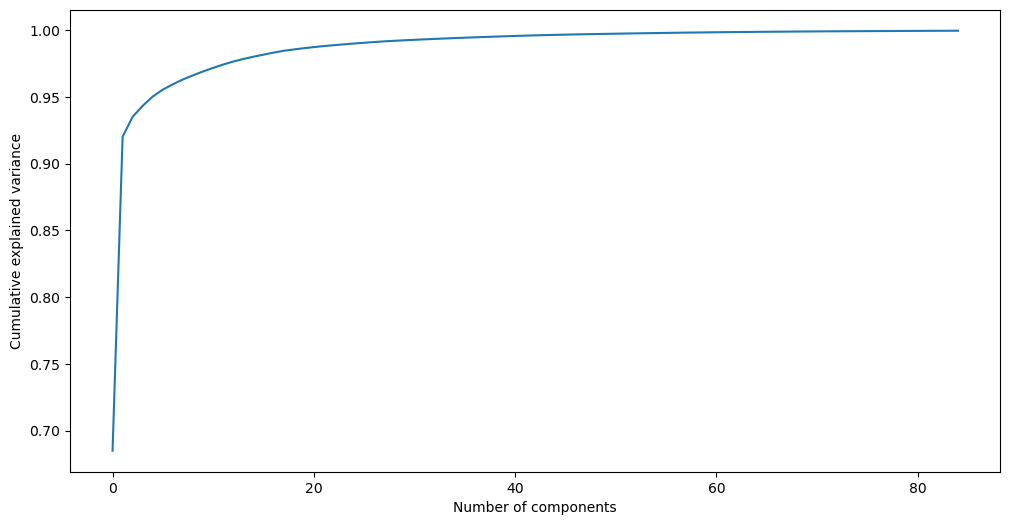

In [24]:
from sklearn.decomposition import PCA

pca_components = 85

pca = PCA(n_components = pca_components)
data = df.iloc[:, :-1].values
dt = pca.fit_transform(data)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

plt.show()

In [25]:
pca_components = 40

pca = PCA(n_components = pca_components)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1, pca_components+1)]+['class']
q.head()

PC-1         PC-2        PC-3        PC-4        PC-5        PC-6  \
0  5014.905985  1456.863260   72.697049   71.204922 -435.686992  -68.840305   
1  5601.383743 -2023.450087  350.134661 -528.465055  148.088288 -288.359015   
2  5796.135442 -3090.394852  490.539930 -760.214345  259.933291 -131.611167   
3  5586.204575 -2369.376085  356.274719 -502.687159  146.554946 -306.679324   
4  5020.990792   339.603390  -23.007525  -92.556773 -368.495445 -438.266702   

         PC-7        PC-8        PC-9       PC-10  ...       PC-32      PC-33  \
0  134.809788 -304.372376  256.432819  -66.631232  ...   18.899407  -1.093725   
1  202.956784  240.848014 -474.858214   93.493479  ...   96.646087 -82.889384   
2  172.927177  205.911167  572.491856 -191.622118  ...   31.827250 -41.418823   
3  251.071066  234.966501 -314.023571   54.962003  ...  127.469189 -63.179781   
4  502.715437 -345.536461 -188.352791  -67.506074  ...  -82.530769  77.372371   

        PC-34      PC-35      PC-36      PC-37      PC-38      PC-39  \
0   23.462511 -19.505481 -30.761382 -25.937307   4.795903  64.556094   
1  -45.514719  30.127506  12.388586  19.896075   0.334059  17.282457   
2   -7.902349  18.144403  36.667178  13.492056 -23.215949 -28.068925   
3   36.291671  23.000175  64.457448   9.097102 -48.324659   3.243100   
4  181.398551  -6.530237 -16.464363  11.647864   4.016074  59.859271   

       PC-40  class  
0   5.499877      3  
1  37.333163      3  
2  77.801721      3  
3  56.595255      3  
4  19.320463      3  

[5 rows x 41 columns]

### 可视化PCA之后的光谱图

In [26]:
print(q.loc[:, f'PC-{i}'].values.shape)

(21025,)


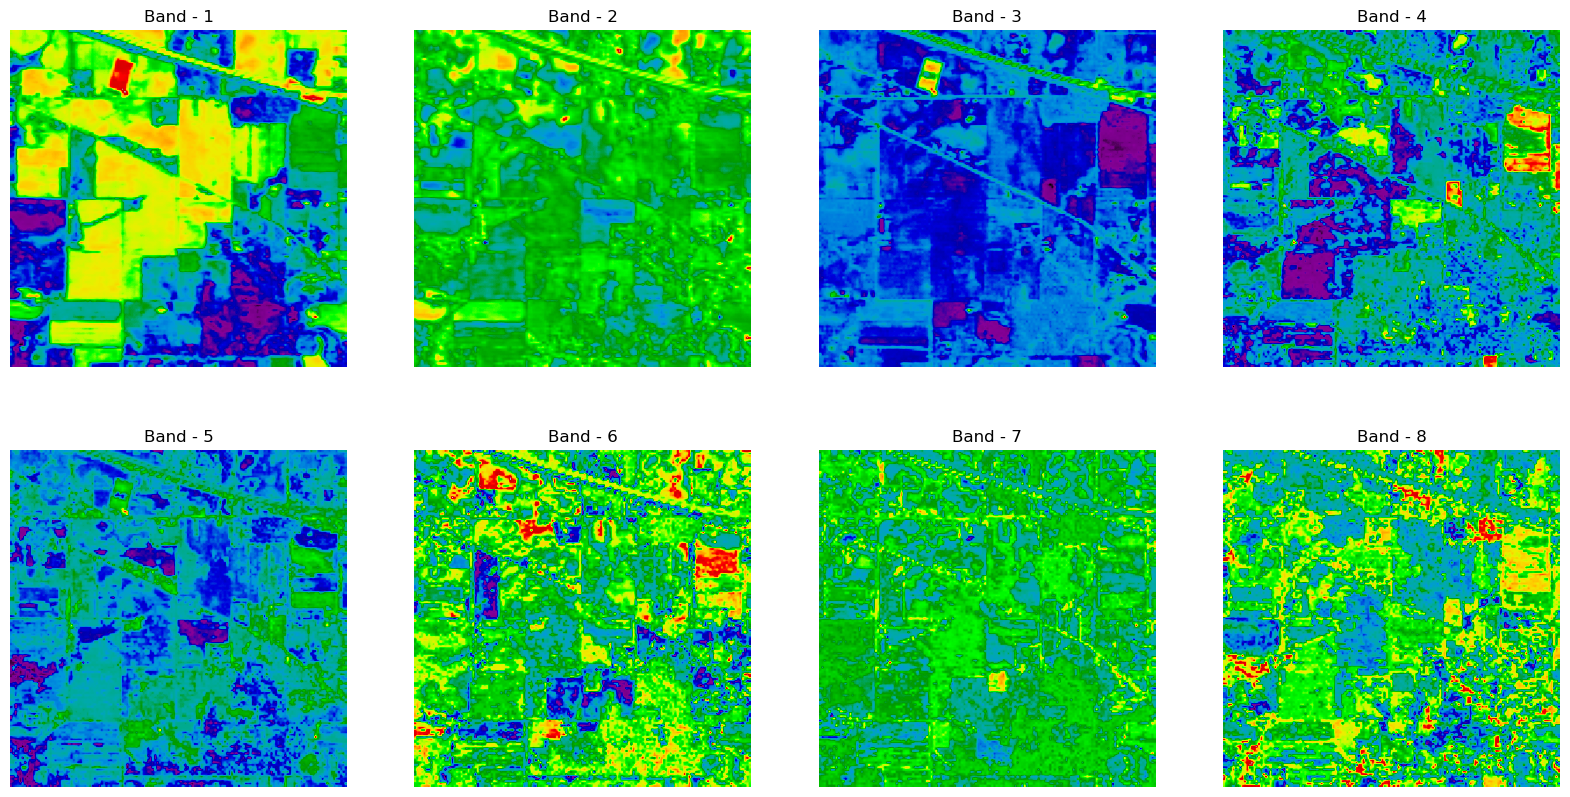

In [27]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(145, 145), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

plt.savefig('IP_PCA_Bands.png')

In [28]:
# saving to .csv
q.to_csv('IP_40_PCA.csv', index=False)

## SVM

In [29]:
x = q[q['class'] != 0]
X = x.iloc[:, :-1].values
y = x.loc[:, 'class'].values 

names = ['Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn', 'Grass-pasture', 'Grass-trees',
         'Grass-pasture-mowed', 'Hay-windrowed', 'Oats', 'Soybean-notill', 'Soybean-mintill',
         'Soybean-clean', 'Wheat', 'Woods', 'Buildings Grass Trees Drives', 'Stone Steel Towers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

svm = SVC(C=100, kernel='rbf', cache_size=10*1024)
svm.fit(X_train, y_train)
ypred = svm.predict(X_test)

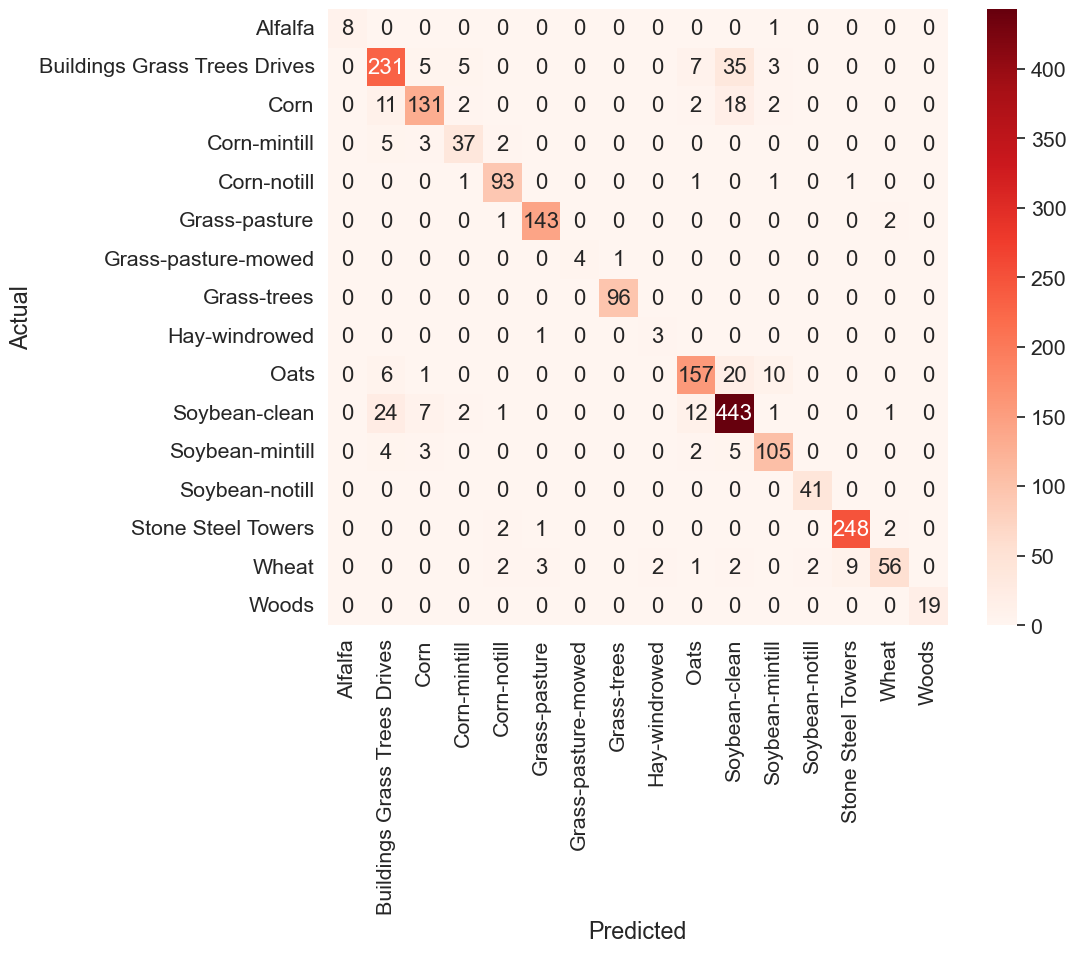

In [30]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')

plt.savefig('cmap.png', dpi=300)

In [31]:
print(classification_report(y_test, ypred, target_names = names))

                              precision    recall  f1-score   support

                     Alfalfa       1.00      0.89      0.94         9
                 Corn-notill       0.82      0.81      0.81       286
                Corn-mintill       0.87      0.79      0.83       166
                        Corn       0.79      0.79      0.79        47
               Grass-pasture       0.92      0.96      0.94        97
                 Grass-trees       0.97      0.98      0.97       146
         Grass-pasture-mowed       1.00      0.80      0.89         5
               Hay-windrowed       0.99      1.00      0.99        96
                        Oats       0.60      0.75      0.67         4
              Soybean-notill       0.86      0.81      0.84       194
             Soybean-mintill       0.85      0.90      0.87       491
               Soybean-clean       0.85      0.88      0.87       119
                       Wheat       0.95      1.00      0.98        41
                   

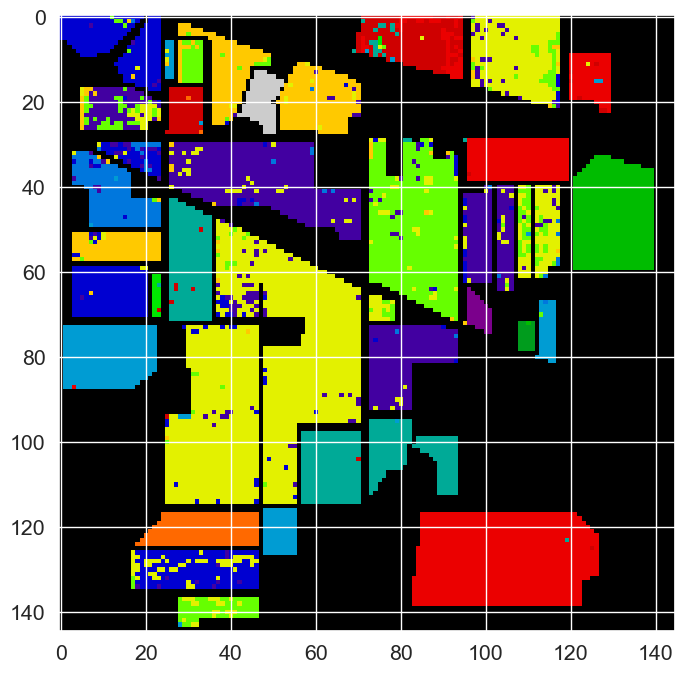

In [32]:
# Classification Map
l = []
for i in range(len(q)):
    if q.iloc[i, -1] == 0:
        l.append(0)
    else:
        l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1))[0])

clmap = np.array(l).reshape(145, 145).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')

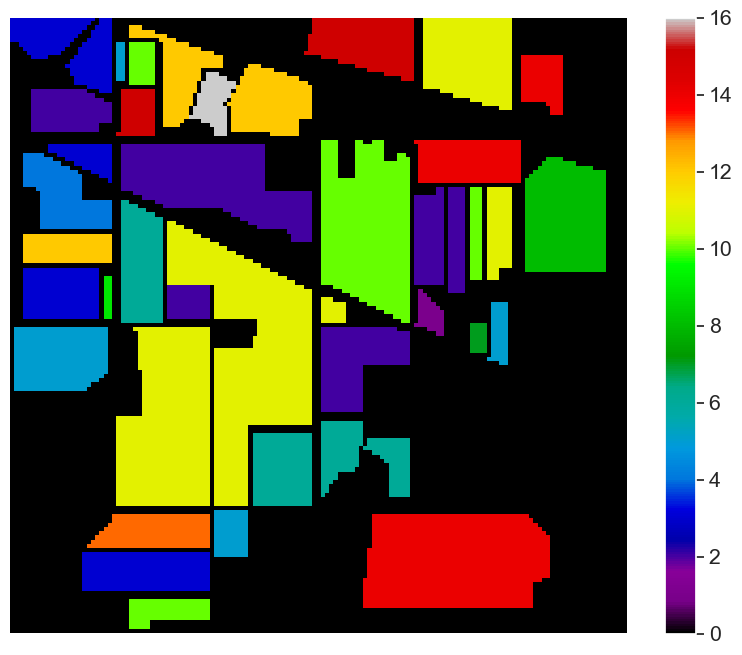

In [33]:
# 真实数据
y = indian_pines_gt

plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap.png')
plt.show()

## 可视化

In [34]:
class_labels = {'1':'Alfalfa',
                '2':'Corn-notill',
                '3':'Corn-mintill',
                '4':'Corn',
                '5':'Grass-pasture',
                '6':'Grass-trees',
                '7':'Grass-pasture-mowed',
                '8':'Hay-windrowed',
                '9':'Oats',
                '10':'Soybean-notill',
                '11':'Soybean-mintill',
                '12':'Soybean-clean',
                '13':'Wheat',
                '14':'Woods',
                '15':'Buildings-Grass-Trees-Drives',
                '16':'Stone-Steel-Towers',
               }

In [35]:
q2 = q[q['class'] != 0]
# 添加真实标签列：将数值标签映射到对应的真实标签
q2['label'] = q2.loc[:, 'class'].apply(lambda x: class_labels[str(x)])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_27004\1143093214.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
q2['label'].value_counts()

Soybean-mintill                 2455
Corn-notill                     1428
Woods                           1265
Soybean-notill                   972
Corn-mintill                     830
Grass-trees                      730
Soybean-clean                    593
Grass-pasture                    483
Hay-windrowed                    478
Buildings-Grass-Trees-Drives     386
Corn                             237
Wheat                            205
Stone-Steel-Towers                93
Alfalfa                           46
Grass-pasture-mowed               28
Oats                              20
Name: label, dtype: int64

In [37]:
q2.head()

PC-1         PC-2        PC-3        PC-4        PC-5        PC-6  \
0  5014.905985  1456.863260   72.697049   71.204922 -435.686992  -68.840305   
1  5601.383743 -2023.450087  350.134661 -528.465055  148.088288 -288.359015   
2  5796.135442 -3090.394852  490.539930 -760.214345  259.933291 -131.611167   
3  5586.204575 -2369.376085  356.274719 -502.687159  146.554946 -306.679324   
4  5020.990792   339.603390  -23.007525  -92.556773 -368.495445 -438.266702   

         PC-7        PC-8        PC-9       PC-10  ...      PC-33       PC-34  \
0  134.809788 -304.372376  256.432819  -66.631232  ...  -1.093725   23.462511   
1  202.956784  240.848014 -474.858214   93.493479  ... -82.889384  -45.514719   
2  172.927177  205.911167  572.491856 -191.622118  ... -41.418823   -7.902349   
3  251.071066  234.966501 -314.023571   54.962003  ... -63.179781   36.291671   
4  502.715437 -345.536461 -188.352791  -67.506074  ...  77.372371  181.398551   

       PC-35      PC-36      PC-37      PC-38      PC-39      PC-40  class  \
0 -19.505481 -30.761382 -25.937307   4.795903  64.556094   5.499877      3   
1  30.127506  12.388586  19.896075   0.334059  17.282457  37.333163      3   
2  18.144403  36.667178  13.492056 -23.215949 -28.068925  77.801721      3   
3  23.000175  64.457448   9.097102 -48.324659   3.243100  56.595255      3   
4  -6.530237 -16.464363  11.647864   4.016074  59.859271  19.320463      3   

          label  
0  Corn-mintill  
1  Corn-mintill  
2  Corn-mintill  
3  Corn-mintill  
4  Corn-mintill  

[5 rows x 42 columns]

In [38]:
import plotly.express as px
count = q2['class'].value_counts()
bar_fig = px.bar(x=count.index[1:], y=count[1:], labels=class_labels, color=count.index[1:])
bar_fig.update_layout(xaxis = dict(title='Class', 
                                   tickmode='array', 
                                   tickvals=count.index[1:].tolist(), 
                                   tickangle = 45,
                                  ),
                      yaxis = dict(title='count',),
                      showlegend=True
                     )
bar_fig.show()

In [39]:
q2['label'].value_counts().min()

20

In [40]:
# 重采样一部分样本以便可视化
# sampling dataset
sample_size = q2['label'].value_counts().min()
sample = q2.groupby('class').apply(lambda x: x.sample(sample_size))
sample

PC-1         PC-2         PC-3         PC-4         PC-5  \
class                                                                           
1     10395    145.562491  -564.411726 -1572.612597   656.890399   709.753568   
      9812    -605.500951 -1186.453760 -1346.056790  2017.266140  -215.816211   
      9522     159.750751 -2616.260274 -1258.053633  1867.226947  -853.623753   
      10684   -650.063218 -1458.941416 -1343.767813  1687.124525   254.217565   
      10251   -799.394882 -2015.859827  -978.666473  2132.155096  -236.503960   
...                   ...          ...          ...          ...          ...   
16    3672   11617.620163 -5344.713874  4544.046117   989.333059  1160.821946   
      2654    9271.658971 -3417.664534  2588.767028   721.797148   500.183045   
      3234   10809.837921  -191.145531  4965.617322   748.943540  1114.905091   
      2656    8723.932719 -5894.568333   776.180018  1110.330780  -628.543118   
      3239   10879.022704   922.249267  5208.088109   584.169833  1183.974346   

                   PC-6        PC-7        PC-8        PC-9       PC-10  ...  \
class                                                                    ...   
1     10395  966.713802 -300.049774   51.386437 -172.817670 -717.107976  ...   
      9812   432.874736  105.786917  672.463019   -6.220349 -469.275962  ...   
      9522  -256.932778    7.729719  457.369478 -318.994469 -328.461862  ...   
      10684  546.420723 -192.406802  480.104899  513.456197 -922.520180  ...   
      10251  397.193334 -156.036910  614.247735  -39.467737 -759.901122  ...   
...                 ...         ...         ...         ...         ...  ...   
16    3672  -223.576179  620.262850 -317.527188  549.409729 -418.405632  ...   
      2654   -82.968080  477.793581 -262.432128  700.767004 -331.672282  ...   
      3234   395.439469 -120.295422 -334.584495  366.276352  -37.826650  ...   
      2656   157.132532 -363.376610  174.537762 -297.610047  181.753943  ...   
      3239   401.413961  -45.506098 -300.911549  523.888921   11.875048  ...   

                  PC-33       PC-34       PC-35       PC-36       PC-37  \
class                                                                     
1     10395    6.055723    9.102467  -96.851913  323.114154 -271.921881   
      9812   -41.645531 -124.819444   22.809964 -196.583911 -103.652471   
      9522   -49.017308  -63.532924   21.754788  -48.125876   86.845448   
      10684  -22.923326 -116.235349   90.219122  -10.260229 -151.536627   
      10251  142.044522   11.352112   88.605395  -46.120650  -12.298188   
...                 ...         ...         ...         ...         ...   
16    3672   114.436609  105.609498  -46.045886   -9.773924 -152.590988   
      2654   -30.951709   54.911275  -30.533345   18.715371  -94.676286   
      3234   271.137129 -184.283252 -184.954696  -23.509253 -195.458996   
      2656   -35.083791  -25.776933   27.139001   94.404007  -78.879408   
      3239   777.153866 -127.023987 -286.684384   -6.296311 -198.344805   

                  PC-38       PC-39       PC-40  class               label  
class                                                                       
1     10395  201.575818   85.571417 -274.646134      1             Alfalfa  
      9812    25.222326  -44.795598  -35.997946      1             Alfalfa  
      9522   312.445783   19.321086 -200.478516      1             Alfalfa  
      10684   17.506403  -26.499718   96.651379      1             Alfalfa  
      10251   55.236428  -10.904316  -90.830664      1             Alfalfa  
...                 ...         ...         ...    ...                 ...  
16    3672   -42.865533   93.738702  -81.833065     16  Stone-Steel-Towers  
      2654    35.465021    2.209127   20.940018     16  Stone-Steel-Towers  
      3234   150.973403 -164.196056   80.969286     16  Stone-Steel-Towers  
      2656   -89.144066    0.212221   43.817056     16  Stone-Steel-Towers  
      3239   153.637676 -2

In [41]:
# !pip install chart_studio
# import chart_studio.plotly as py

In [42]:
fig = px.scatter(sample, x="PC-1", y="PC-2", size="class", color="label",
                 hover_name="label", log_x=True, size_max=12)
fig.show()

In [43]:
# Box Plot
fig = px.violin(sample, y="PC-1", x="PC-2", color="label", 
                      box=True, points="all", hover_data=['PC-1', 'PC-2', 'PC-3','label'])
fig.show()

In [44]:
scatter_3d = px.scatter_3d(sample, x="PC-1", y="PC-2", z="PC-3", 
                           color="label", size="class", hover_name="label",symbol="label")
# color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})
scatter_3d.show()
# py.plot(scatter_3d, filename = 'scatter_3d', auto_open=True)

堆叠面积图适用于可视化“部分-整体”的关系，这有助于展现各分类及总体的发展趋势和相互之间的关系。

层叠面积图上最大的面积代表了所有数据量的总和，是一个整体。各个叠起来的面积表示各个数据量的大小，这些堆叠起来的面积图在表现大数据的总分量的变化情况时格外有用，所以层叠面积图非常适用于对比多变量随时间变化的情况。层叠面积图并不能反映总量的变化，但是可以清晰的反应每个数值所占百分比随时间或类别变化的趋势线，这对于分析自变量是大数据、时变数据、有序数据时各个指标分量占比极为有用。


> ref:https://www.edrawsoft.cn/what-is-area-chart/mianjitu

In [45]:
area_plt1 = px.area(sample, x="PC-1", y="PC-2", color="label", line_group="label")
area_plt1.show()
# py.plot(area_plt1, filename = 'area_plt1', auto_open=True)

In [46]:
area_plt2 = px.area(sample, x="PC-1", y="PC-3", color="label", line_group="label")
area_plt2.show()
# py.plot(area_plt2, filename = 'area_plt2', auto_open=True)

In [47]:
area_plt3 = px.area(sample, x="PC-2", y="PC-3", color="label", line_group="label")
area_plt3.show()
# py.plot(area_plt3, filename = 'area_plt2', auto_open=True)

In [48]:
pair = px.scatter_matrix(sample, dimensions=["PC-1", "PC-2", "PC-3"], color="label")
pair.show()
# py.plot(pair, filename = 'pair_plot_pc', auto_open=True)

C:\Users\lenovo\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [49]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [50]:
np.linspace(-100, 100, 20, dtype=int).shape

(20,)

In [51]:
x = np.linspace(-100, 100, 20, dtype=int)
y = 1.0/(1 + np.exp(-x))

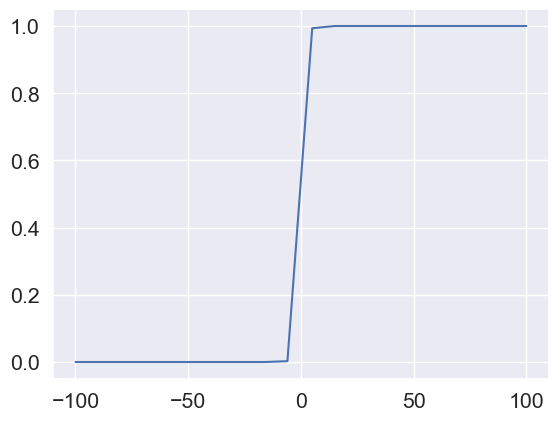

In [52]:
plt.plot(x,y)